Time series aspects, here we analize some statistics on the complete dataset from 1979

In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pandas import Grouper
import seaborn as sns
import matplotlib as mpl
import datetime as dt

In [2]:
dataset1=pd.read_csv("file:///Users/davidelibera/Desktop/Projects%20/project%20data%20science/dft-road-casualty-statistics-accident-1979-2020.csv",low_memory=False,index_col='date')
#set the index on date to see the variation in the time period

In [3]:
dataset1.index=pd.to_datetime(dataset1.index) #convert index to datetime
dataset1.shape

(8602824, 35)

In [56]:
unique,counts=np.unique(dataset1.index,return_counts=True)
counts0=counts[:15330] #select 15330 ou 15349 to make divisible by 365
countsreshaped = np.sum(counts0.reshape(-1, 365), axis=1)
countsdf=pd.DataFrame(countsreshaped)


In [57]:
dataset1fatal_accidents = dataset1[dataset1['accident_severity']==1] #a new dataset with only fatal accidents
unique,counts=np.unique(dataset1fatal_accidents.index,return_counts=True)
counts1=counts[:14965]
countsreshaped1 = np.sum(counts1.reshape(-1, 365), axis=1)
countsdf1=pd.DataFrame(countsreshaped1)


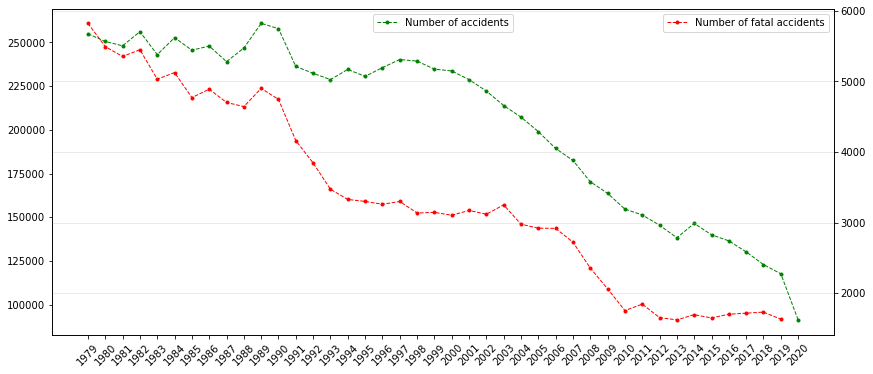

In [73]:
fig,ax = plt.subplots(figsize=(14,6))
ax_right = ax.twinx()
ax.plot(countsdf, marker='.', linestyle='--',linewidth=1, label='Number of accidents',color='green')
ax_right.plot(countsdf1, marker='.', linestyle='--',linewidth=1, label='Number of fatal accidents',color='red')

plt.xticks(ticks=range(0,42,1))

plt.grid(alpha=0.3)
ax.legend(loc='upper center')
ax_right.legend()
ax.set_xticklabels(range(1979,2021,1),rotation='45')
plt.show()

In [11]:
dataset_month1 = dataset1.resample("M").sum() #divide the time interval in months with the sum of values

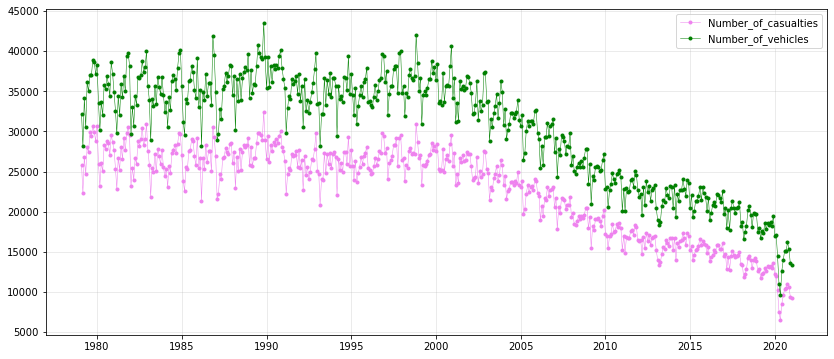

In [12]:
start, end = '1979-01', '2020-12'
fig,ax = plt.subplots(figsize=(14,6))
ax.plot(dataset_month1.loc[start:end, 'number_of_casualties'], marker='.', linestyle='-', linewidth = 0.5, label='Number_of_casualties', color='violet')
ax.plot(dataset_month1.loc[start:end, 'number_of_vehicles'], marker='.', linestyle='-', linewidth = 0.5, label='Number_of_vehicles', color='green')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [13]:
dataset_12month_rolling1 = dataset_month1.rolling(12,min_periods=1, center=True).mean()

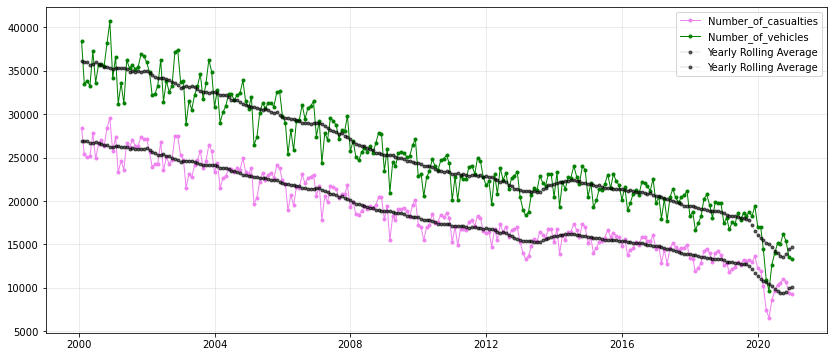

In [14]:
start, end = '2000-01', '2020-12'
fig,ax = plt.subplots(figsize=(14,6))
ax.plot(dataset_month1.loc[start:end, 'number_of_casualties'], marker='.', linestyle='-', linewidth = 1, label='Number_of_casualties', color='violet')
ax.plot(dataset_month1.loc[start:end, 'number_of_vehicles'], marker='.', linestyle='-', linewidth = 1, label='Number_of_vehicles', color='green')
ax.plot(dataset_12month_rolling1.loc[start:end,'number_of_casualties'], marker='.', linestyle='--',linewidth=0.3, label='Yearly Rolling Average',color='black',alpha=0.6)
ax.plot(dataset_12month_rolling1.loc[start:end,'number_of_vehicles'], marker='.', linestyle='--',linewidth=0.3, label='Yearly Rolling Average',color='black',alpha=0.6)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

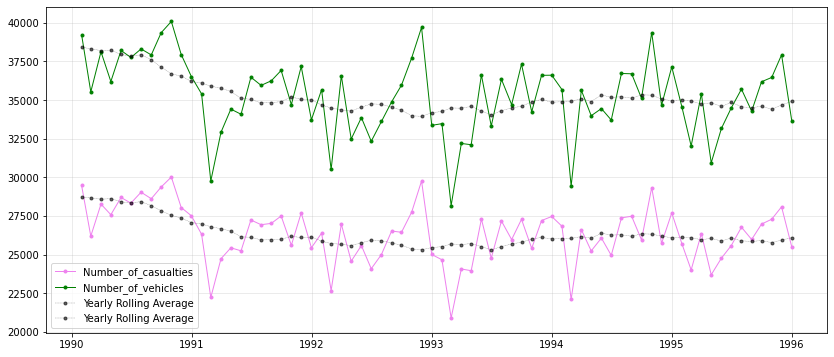

In [15]:
start, end = '1990-01', '1995-12'
fig,ax = plt.subplots(figsize=(14,6))
ax.plot(dataset_month1.loc[start:end, 'number_of_casualties'], marker='.', linestyle='-', linewidth = 1, label='Number_of_casualties', color='violet')
ax.plot(dataset_month1.loc[start:end, 'number_of_vehicles'], marker='.', linestyle='-', linewidth = 1, label='Number_of_vehicles', color='green')
ax.plot(dataset_12month_rolling1.loc[start:end,'number_of_casualties'], marker='.', linestyle='--',linewidth=0.3, label='Yearly Rolling Average',color='black',alpha=0.6)
ax.plot(dataset_12month_rolling1.loc[start:end,'number_of_vehicles'], marker='.', linestyle='--',linewidth=0.3, label='Yearly Rolling Average',color='black',alpha=0.6)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [16]:
dataset_month = dataset1.resample('M').mean() #divide the time interval in months with the average values

In [17]:
dataset_12month_rolling = dataset_month.rolling(12,min_periods=1, center=True).mean() # calculate the rolling mean every year


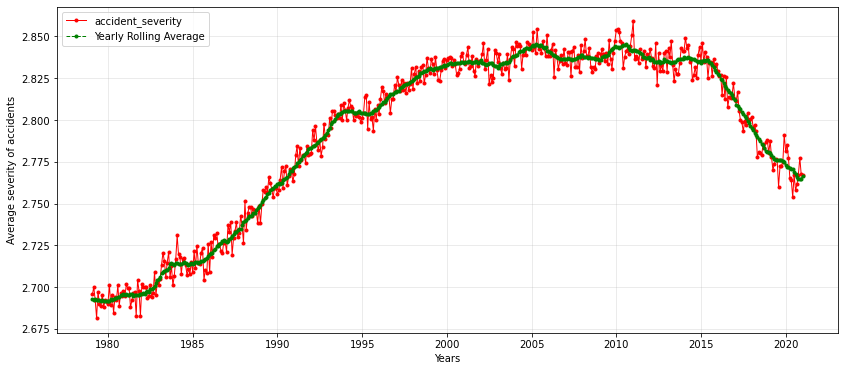

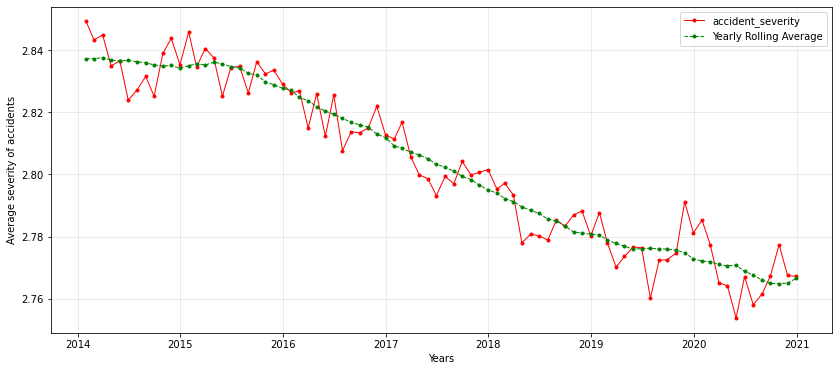

In [18]:
start, end = '1979-01', '2020-12'
fig,ax = plt.subplots(figsize=(14,6))
ax.plot(dataset_month.loc[start:end, 'accident_severity'], marker='.', linestyle='-', linewidth = 1, label='accident_severity', color='red')
ax.plot(dataset_12month_rolling.loc[start:end,'accident_severity'], marker='.', linestyle='--',linewidth=1, label='Yearly Rolling Average',color='green')

plt.legend()
plt.grid(alpha=0.3)
plt.xlabel('Years')
plt.ylabel('Average severity of accidents')
plt.show()
start, end = '2014-01', '2020-12'
fig,ax = plt.subplots(figsize=(14,6))
ax.plot(dataset_month.loc[start:end, 'accident_severity'], marker='.', linestyle='-', linewidth = 1, label='accident_severity', color='red')
ax.plot(dataset_12month_rolling.loc[start:end,'accident_severity'], marker='.', linestyle='--',linewidth=1, label='Yearly Rolling Average',color='green')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Average severity of accidents')
plt.grid(alpha=0.3)
plt.show()

Let's now analize the distribution of accidents during the day, in 2018


In [19]:
dataset2=pd.read_csv("file:///Users/davidelibera/Desktop/Projects%20/project%20data%20science/dft-road-casualty-statistics-accident-2018.csv",low_memory=False,index_col='time')

In [20]:
dataset2.index=pd.to_datetime(dataset2.index)

In [21]:
dataset2.fatal_accidents = dataset2[dataset2['accident_severity']==1]


<ipython-input-21-bfc38aca43c8>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset2.fatal_accidents = dataset2[dataset2['accident_severity']==1]


In [22]:
dataset2index=np.array(dataset2.index)
unique,counts=np.unique(dataset2index,return_counts=True) #count the number of the total incidents

In [23]:
countsdf=pd.DataFrame(counts) 
countsdf_7d_rolling = countsdf.rolling(60,min_periods=1, center=True).mean()

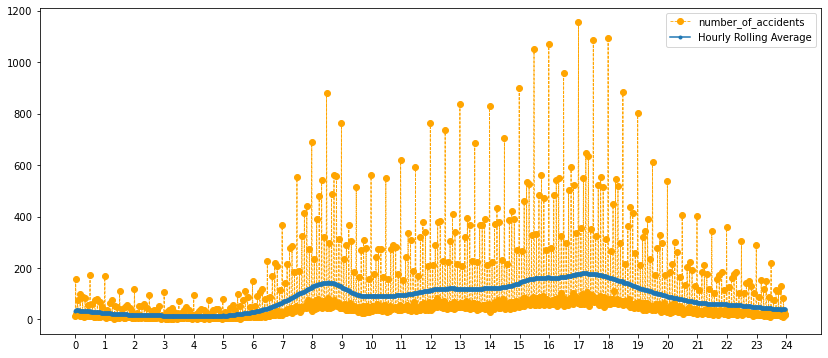

In [24]:
fig,ax = plt.subplots(figsize=(14,6))
ax.plot(counts,marker='o', linestyle='--', linewidth = 0.8, color='orange',label='number_of_accidents')
ax.plot(countsdf_7d_rolling, marker='.', linestyle='-', label='Hourly Rolling Average')
plt.xticks(ticks=range(0,1500,60),labels=range(0,25,1))
plt.legend()
plt.show()


In [25]:
dataset_hour= dataset2.resample('H').sum()#divide the time interval in hours with the sum of values 
dataset_hour_fatal=dataset2.fatal_accidents.resample('H').sum()

<ipython-input-35-7b0bcd25deb3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1,25,1),rotation=45)


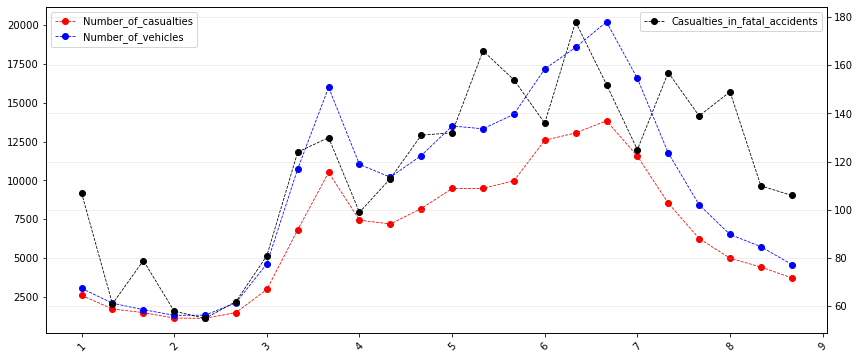

In [35]:
start, end = '00:00:00', '23:59:00'
fig,ax = plt.subplots(figsize=(14,6))
ax_right = ax.twinx()
ax.plot(dataset_hour['number_of_casualties'], marker='o', linestyle='--', linewidth = 0.8, label='Number_of_casualties', color='red')
ax.plot(dataset_hour['number_of_vehicles'],marker='o', linestyle='--', linewidth = 0.8, label='Number_of_vehicles', color='blue')
ax_right.plot(dataset_hour_fatal['number_of_casualties'],marker='o', linestyle='--', linewidth = 0.8, label='Casualties_in_fatal_accidents', color='black')

xtick_location = dataset_hour.index
#plt.xticks(ticks=xtick_location,labels=range(1,25,1))
ax.set_xticklabels(range(1,25,1),rotation=45)
ax.legend(loc='upper left')
ax_right.legend()
plt.grid(alpha=0.25)
plt.show()


In [27]:
dataset2_rolling = dataset_hour.rolling(3,min_periods=1, center=True).mean()
dataset2_fatal_rolling = dataset_hour_fatal.rolling(3,min_periods=1, center=True).mean()

In [ ]:
start, end = '00:00:00', '23:59:00'
fig,ax = plt.subplots(figsize=(14,6))
ax_right = ax.twinx()
ax.plot(dataset2_rolling['number_of_casualties'], marker='o', linestyle='--', linewidth = 0.8, label='Number_of_casualties', color='red')
ax_right.plot(dataset2_fatal_rolling['number_of_casualties'],marker='o', linestyle='--', linewidth = 0.8, label='Casualties_in_fatal_accidents', color='black')
xtick_location = dataset_hour.index
plt.xticks(ticks=xtick_location,labels=range(1,25,1))
ax.legend(loc='upper left')
ax_right.legend()
plt.grid(alpha=0.3)
plt.show()

Now we want to find if there is a particular distribution troughout the year

In [3]:
dataset3=pd.read_csv("file:///Users/davidelibera/Desktop/Projects%20/project%20data%20science/dft-road-casualty-statistics-accident-2018.csv",low_memory=False,index_col='date')

In [5]:
dataset3fatal_accidents = dataset3[dataset3['accident_severity']==1]

In [6]:
unique,counts=np.unique(dataset3.index,return_counts=True)

In [7]:
unique,counts2=np.unique(dataset3fatal_accidents.index,return_counts=True)

In [8]:
countsdf=pd.DataFrame(counts)
countsdf_7d_rolling = countsdf.rolling(7,min_periods=1, center=True).mean()
countsdf2=pd.DataFrame(counts2)
countsdf2_7d_rolling = countsdf2.rolling(7,min_periods=1, center=True).mean()

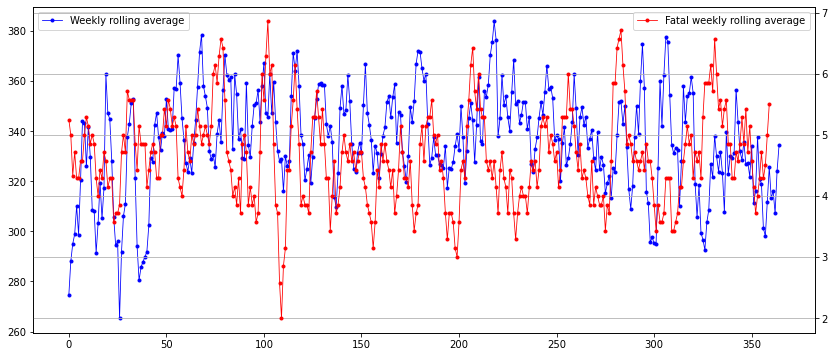

In [9]:
fig,ax = plt.subplots(figsize=(14,6))
ax_right = ax.twinx()
#ax.plot(counts,marker='.', linestyle='--', linewidth = 0.5, color='orange',label='number_of_accidents')
ax.plot(countsdf_7d_rolling,marker='.', linestyle='-', linewidth = 0.8, color='blue',label='Weekly rolling average')
#ax_right.plot(counts2,marker='.', linestyle='-', linewidth = 0.8, color='red',label='weekly_rolling_average')
ax_right.plot(countsdf2_7d_rolling,marker='.', linestyle='-', linewidth = 0.8, color='red',label='Fatal weekly rolling average')
#plt.xticks(ticks=range(0,1500,60),labels=range(0,25,1))
plt.grid()
ax.legend(loc='upper left') 
ax_right.legend(loc=0)
plt.show()





In [ ]:
dataset3.index=pd.to_datetime(dataset3.index)


In [ ]:
dataset3_week = dataset3.resample("W").sum()
dataset3_week_fatal=dataset3.fatal_accidents.resample('W').sum()

In [ ]:
dataset3_rolling = dataset3_week.rolling(4,min_periods=1, center=True).mean()
dataset3_fatal_rolling = dataset3_week_fatal.rolling(4,min_periods=1, center=True).mean()

In [ ]:

fig,ax = plt.subplots(figsize=(14,6))
ax_right = ax.twinx()
ax.plot(dataset3_rolling['number_of_casualties'], marker='o', linestyle='--', linewidth = 0.8, label='Number_of_casualties', color='purple')
#ax.plot(dataset3_week['number_of_vehicles'],marker='o', linestyle='--', linewidth = 0.8, label='Number_of_vehicles', color='green')
ax_right.plot(dataset3_fatal_rolling['number_of_casualties'],marker='o',color='black',linestyle='--',linewidth=0.8,label='Casualties_in_fatal_accidents')
xtick_location = dataset3_week.index
plt.xticks(ticks=xtick_location,labels=range(1,54,1))
ax.legend(loc='upper left')
ax_right.legend(loc='lower left')

plt.grid(alpha=0.25)
plt.show()
